https://insightlab.ufc.br/10-funcoes-mais-usadas-para-manipular-dataframes-no-pandas

# Importação de Bibliotecas e Tratamento do Arquivo

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statistics
import matplotlib.pyplot as plt

Importação do arquivo

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
# Conferindo importação
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df['bathrooms'] = df['bathrooms'].astype(int)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Convertendo zipcode em Cidade

In [ ]:
!pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from uszipcode import SearchEngine
engine = SearchEngine()

Exception ignored in: <function SearchEngine.__del__ at 0x7f2b590fda70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.7/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 1811, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 1853, in _close_impl
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 923, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2416, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2639, in _do_close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2625, in _close_impl
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2617, in _connection_rollback_impl
  File "/usr/lo

In [ ]:
df['city_name'] = df['zipcode'].map(lambda x: engine.by_zipcode(x).major_city)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city_name
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish


## Ajustando a data

In [ ]:
df['date'] = df['date'].str.slice(0,-7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int64  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Diminuindo uso de memória do dataset

In [ ]:
df = df.drop(columns=['lat'])
df = df.drop(columns=['long'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int64  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

# Análise Exploratória

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,city_name
0,7129300520,20141013,221900.0,3,1,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,Seattle
1,6414100192,20141209,538000.0,3,2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,Seattle
2,5631500400,20150225,180000.0,2,1,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,Kenmore
3,2487200875,20141209,604000.0,4,3,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,Seattle
4,1954400510,20150218,510000.0,3,2,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,Sammamish


## Avaliando correlação

In [ ]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,-0.000038,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.510072,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.467452,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,0.391638,0.029244
bathrooms,-0.000038,0.510072,0.467452,1.000000,0.697875,0.085310,0.473840,0.058798,0.177257,-0.126016,0.606631,0.639933,0.250880,0.433647,0.060436,-0.159773,0.510049,0.080779
sqft_living,-0.012258,0.702035,0.576671,0.697875,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.085310,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.473840,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.058798,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.177257,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.126016,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.092824,-0.003406


Correlações relevantes observadas:

* Price x sqft_living
* Price x grade
* Price x sqft_above
* Price x bathroom
* Price x sqft_living15



## Reduzindo DF

In [ ]:
df = df.drop(columns=['waterfront'])
df = df.drop(columns=['view'])
df = df.drop(columns=['condition'])
df = df.drop(columns=['zipcode'])

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city_name
0,7129300520,20141013,221900.0,3,1,1180,5650,1.0,7,1180,0,1955,0,1340,5650,Seattle
1,6414100192,20141209,538000.0,3,2,2570,7242,2.0,7,2170,400,1951,1991,1690,7639,Seattle
2,5631500400,20150225,180000.0,2,1,770,10000,1.0,6,770,0,1933,0,2720,8062,Kenmore
3,2487200875,20141209,604000.0,4,3,1960,5000,1.0,7,1050,910,1965,0,1360,5000,Seattle
4,1954400510,20150218,510000.0,3,2,1680,8080,1.0,8,1680,0,1987,0,1800,7503,Sammamish


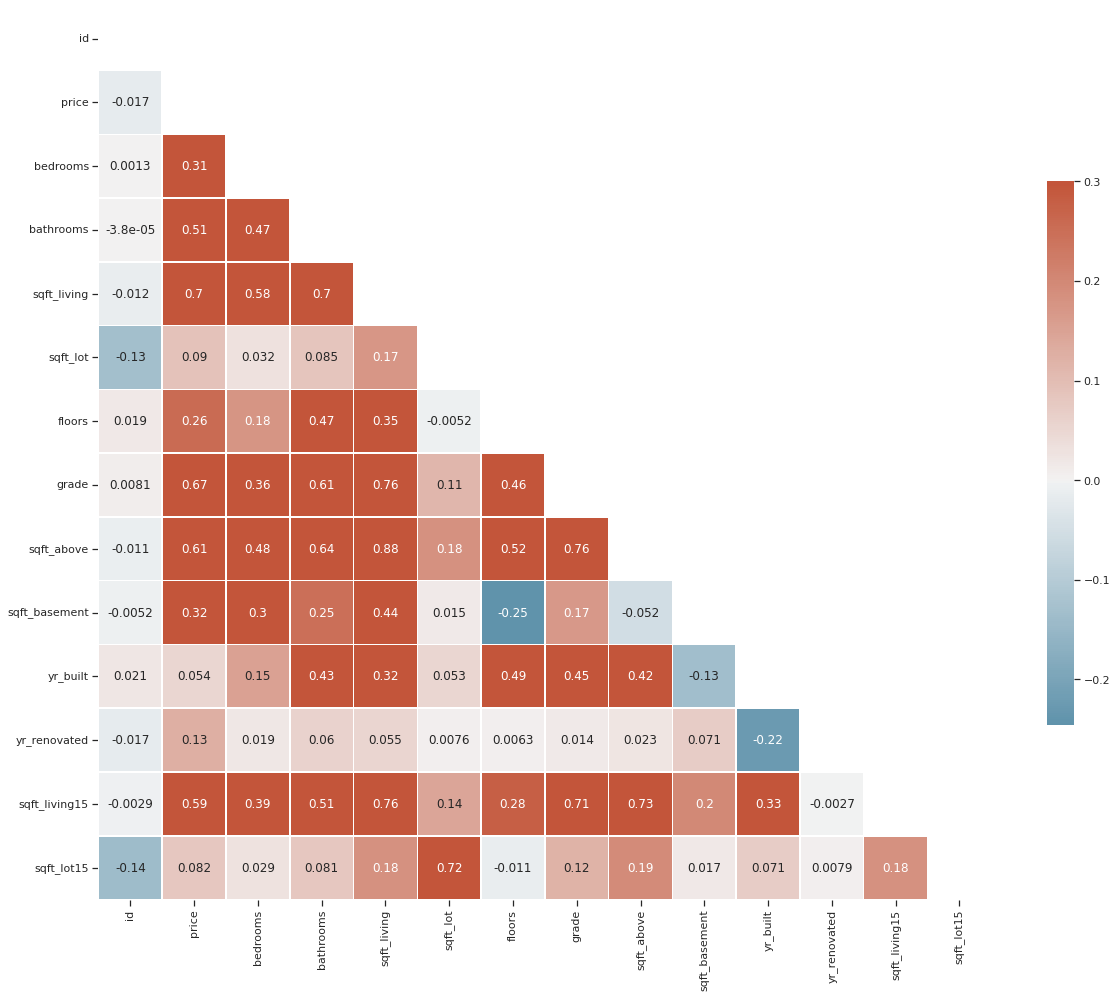

In [ ]:
sns.set_theme(style="ticks")

corr = df.corr(method ='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, annot = True, cbar_kws={"shrink": .5})

## Avaliando correlação sem imóveis duplicados

In [ ]:
unicos = df.drop_duplicates(['id'])

In [ ]:
unicos.corr(method = 'pearson')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,1.000000,-0.018514,0.000831,-0.000991,-0.013467,-0.132846,0.018057,0.006416,-0.011836,-0.005795,0.020933,-0.017178,-0.004084,-0.139670
price,-0.018514,1.000000,0.309007,0.510312,0.701993,0.088895,0.256278,0.667496,0.605495,0.323552,0.052967,0.127002,0.584688,0.082038
bedrooms,0.000831,0.309007,1.000000,0.468204,0.577512,0.031719,0.175207,0.358396,0.478441,0.303035,0.153745,0.018435,0.393161,0.029117
bathrooms,-0.000991,0.510312,0.468204,1.000000,0.697643,0.084677,0.473069,0.606680,0.639535,0.250788,0.432883,0.060887,0.509767,0.080273
sqft_living,-0.013467,0.701993,0.577512,0.697643,1.000000,0.171957,0.352867,0.762402,0.876683,0.434419,0.316544,0.055084,0.756205,0.182775
sqft_lot,-0.132846,0.088895,0.031719,0.084677,0.171957,1.000000,-0.005950,0.112541,0.182581,0.015107,0.052447,0.007636,0.143650,0.718097
floors,0.018057,0.256278,0.175207,0.473069,0.352867,-0.005950,1.000000,0.457475,0.522648,-0.246066,0.489062,0.005626,0.278854,-0.011917
grade,0.006416,0.667496,0.358396,0.606680,0.762402,0.112541,0.457475,1.000000,0.756068,0.167032,0.445329,0.014357,0.712507,0.118313
sqft_above,-0.011836,0.605495,0.478441,0.639535,0.876683,0.182581,0.522648,0.756068,1.000000,-0.052456,0.422838,0.022666,0.731992,0.193413
sqft_basement,-0.005795,0.323552,0.303035,0.250788,0.434419,0.015107,-0.246066,0.167032,-0.052456,1.000000,-0.134590,0.071909,0.199247,0.017283


In [ ]:
unicos.sort_values(['sqft_living'], ascending=False).reset_index()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city_name
0,12777,1225069038,20140505,2280000.0,7,8,13540,307752,3.0,12,9410,4130,1999,0,4850,217800,Redmond
1,7252,6762700020,20141013,7700000.0,6,8,12050,27600,2.5,13,8570,3480,1910,1987,3940,8800,Seattle
2,3914,9808700762,20140611,7062500.0,5,4,10040,37325,2.0,11,7680,2360,1940,2001,3930,25449,Bellevue
3,9254,9208900037,20140919,6885000.0,6,7,9890,31374,2.0,13,8860,1030,2001,0,4540,42730,Medina
4,8092,1924059029,20140617,4668000.0,5,6,9640,13068,1.0,12,4820,4820,1983,2009,3270,10454,Mercer Island
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21431,21332,9266700190,20150511,245000.0,1,1,390,2000,1.0,6,390,0,1920,0,1340,5100,Seattle
21432,18379,1222029077,20141029,265000.0,0,0,384,213444,1.0,4,384,0,2003,0,1920,224341,Vashon
21433,860,1723049033,20140620,245000.0,1,0,380,15000,1.0,5,380,0,1963,0,1170,15000,Seattle
21434,15381,2856101479,20140701,276000.0,1,0,370,1801,1.0,5,370,0,1923,0,1340,5000,Seattle


In [ ]:
unicos.sort_values(['grade'], ascending=False).reset_index()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city_name
0,7907,1068000375,20140923,3200000.0,6,5,7100,18200,2.5,13,5240,1860,1933,2002,3130,6477,Seattle
1,10373,3303850390,20141212,2983000.0,5,5,7400,18898,2.0,13,6290,1110,2001,0,6110,26442,Bellevue
2,7252,6762700020,20141013,7700000.0,6,8,12050,27600,2.5,13,8570,3480,1910,1987,3940,8800,Seattle
3,7035,853200010,20140701,3800000.0,5,5,7050,42840,1.0,13,4320,2730,1978,0,5070,20570,Bellevue
4,19017,2303900100,20140911,3800000.0,3,4,5510,35000,2.0,13,4910,600,1997,0,3430,45302,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21431,6480,7203601405,20150414,217000.0,2,1,730,2400,1.0,4,730,0,1934,0,1220,4382,Seattle
21432,1149,3421079032,20150217,75000.0,1,0,670,43377,1.0,3,670,0,1966,0,1160,42882,Enumclaw
21433,3223,2420069251,20150225,262000.0,1,0,520,12981,1.0,3,520,0,1920,0,1340,12233,Enumclaw
21434,5832,5702500050,20141104,280000.0,1,0,600,24501,1.0,3,600,0,1950,0,990,22549,North Bend


In [ ]:
unicos.sort_values(['sqft_above'], ascending=False).reset_index()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city_name
0,12777,1225069038,20140505,2280000.0,7,8,13540,307752,3.0,12,9410,4130,1999,0,4850,217800,Redmond
1,9254,9208900037,20140919,6885000.0,6,7,9890,31374,2.0,13,8860,1030,2001,0,4540,42730,Medina
2,7252,6762700020,20141013,7700000.0,6,8,12050,27600,2.5,13,8570,3480,1910,1987,3940,8800,Seattle
3,18302,6072800246,20140702,3300000.0,5,6,8020,21738,2.0,11,8020,0,2001,0,4160,18969,Bellevue
4,13411,2426039123,20150130,2415000.0,5,4,7880,24250,2.0,13,7880,0,1996,0,2740,10761,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21431,4868,6896300380,20141002,228000.0,0,1,390,5900,1.0,4,390,0,1953,0,2170,6000,Seattle
21432,18379,1222029077,20141029,265000.0,0,0,384,213444,1.0,4,384,0,2003,0,1920,224341,Vashon
21433,860,1723049033,20140620,245000.0,1,0,380,15000,1.0,5,380,0,1963,0,1170,15000,Seattle
21434,15381,2856101479,20140701,276000.0,1,0,370,1801,1.0,5,370,0,1923,0,1340,5000,Seattle


In [ ]:
unicos.sort_values(['sqft_living15'], ascending=False).reset_index()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city_name
0,19858,2524069078,20150122,2700000.0,4,4,7850,89651,2.0,12,7850,0,2006,0,6210,95832,Issaquah
1,10373,3303850390,20141212,2983000.0,5,5,7400,18898,2.0,13,6290,1110,2001,0,6110,26442,Bellevue
2,5451,7237501190,20141010,1780000.0,4,3,4890,13402,2.0,13,4890,0,2004,0,5790,13539,Renton
3,20830,715010140,20141002,1750000.0,5,3,5790,12739,2.0,10,4430,1360,2014,0,5790,13928,Bellevue
4,20563,715010110,20140804,1240420.0,5,3,5790,13726,2.0,10,4430,1360,2014,0,5790,13726,Bellevue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21431,17887,8150100265,20141118,255000.0,2,1,620,4760,1.0,6,620,0,1941,0,620,4760,Seattle
21432,1920,8150100240,20150218,265000.0,2,1,620,4760,1.0,6,620,0,1941,0,620,4760,Seattle
21433,12106,3822200036,20140624,257500.0,2,2,1180,9265,1.0,7,1180,0,1940,0,460,18000,Seattle
21434,17286,9421500130,20140616,378000.0,5,2,2760,8015,1.0,8,1600,1160,1960,0,460,18000,Seattle


In [ ]:
unicos.sort_values(['bathrooms'], ascending=False).reset_index()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city_name
0,7252,6762700020,20141013,7700000.0,6,8,12050,27600,2.5,13,8570,3480,1910,1987,3940,8800,Seattle
1,12777,1225069038,20140505,2280000.0,7,8,13540,307752,3.0,12,9410,4130,1999,0,4850,217800,Redmond
2,9254,9208900037,20140919,6885000.0,6,7,9890,31374,2.0,13,8860,1030,2001,0,4540,42730,Medina
3,8546,424049043,20140811,450000.0,9,7,4050,6504,2.0,7,4050,0,1996,0,1448,3866,Seattle
4,12370,6065300370,20150506,4208000.0,5,6,7440,21540,2.0,12,5550,1890,2003,0,4740,19329,Bellevue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21431,1389,4102000075,20140522,275000.0,1,0,1170,14149,1.0,7,880,290,1962,0,1130,24513,Enumclaw
21432,1168,3523029041,20141009,290000.0,2,0,440,8313,1.0,5,440,0,1943,0,880,26289,Vashon
21433,1149,3421079032,20150217,75000.0,1,0,670,43377,1.0,3,670,0,1966,0,1160,42882,Enumclaw
21434,17984,3448001975,20150504,351000.0,1,0,930,6600,1.0,6,930,0,1924,0,1590,6600,Seattle


In [ ]:
values_1=[424049043,6065300370,7237501190,715010140,715010110,2524069078,6072800246,2426039123,853200010,2303900100,1068000375,1924059029,9808700762]
filtered_df = df[df.id.isin(values_1)]
print(filtered_df)

               id      date      price  bedrooms  bathrooms  sqft_living  \
3914   9808700762  20140611  7062500.0         5          4        10040   
5451   7237501190  20141010  1780000.0         4          3         4890   
7035    853200010  20140701  3800000.0         5          5         7050   
7907   1068000375  20140923  3200000.0         6          5         7100   
8092   1924059029  20140617  4668000.0         5          6         9640   
8546    424049043  20140811   450000.0         9          7         4050   
12370  6065300370  20150506  4208000.0         5          6         7440   
13411  2426039123  20150130  2415000.0         5          4         7880   
18302  6072800246  20140702  3300000.0         5          6         8020   
19017  2303900100  20140911  3800000.0         3          4         5510   
19858  2524069078  20150122  2700000.0         4          4         7850   
20563   715010110  20140804  1240420.0         5          3         5790   
20830   7150